In [1]:
## https://www.kaggle.com/datasets/anshtanwar/top-200-trending-books-with-reviews?select=customer+reviews.csv

In [2]:
# Import Libararies
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Knn Imputer
from sklearn.impute import KNNImputer

# TextBlob
from textblob import TextBlob

# standard scalar and MinMaxScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Clasifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


#pipeline
from sklearn.pipeline import Pipeline

#Train Test split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# for NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
from bs4 import BeautifulSoup

# For Reduce Imbalancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# WordCloud
from wordcloud import WordCloud

# Count Vectorizer 
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('customer reviews.csv')

In [4]:
df

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
...,...,...,...,...,...,...,...,...,...,...
915,915,The Wonky Donkey,The best child/grandmother book ever written,Marilyn Kreienkamp,5,This is exactly the kind of book children unde...,True,02-11-2023,"Reviewed in the United States November 2, 2023",545261244
916,916,The Wonky Donkey,Great book,Amazon Customer,5,We get this book for all our grandchildren the...,True,30-10-2023,"Reviewed in the United States October 30, 2023",545261244
917,917,The Wonky Donkey,"Fun book, makes you laugh",Jennifer Tinucci,5,I saw a grandma reading this book to her grand...,True,24-10-2023,"Reviewed in the United States October 24, 2023",545261244
918,918,The Wonky Donkey,Cutest beck ever!!,Janice Easter,5,I have ordered this book over and over to give...,True,19-10-2023,"Reviewed in the United States October 19, 2023",545261244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sno                 920 non-null    int64 
 1   book name           920 non-null    object
 2   review title        920 non-null    object
 3   reviewer            920 non-null    object
 4   reviewer rating     920 non-null    int64 
 5   review description  920 non-null    object
 6   is_verified         920 non-null    bool  
 7   date                920 non-null    object
 8   timestamp           920 non-null    object
 9   ASIN                920 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 65.7+ KB


In [6]:
df.describe()

,Sno,reviewer rating
count,920.000000,920.000000
mean,459.500000,4.826087
std,265.725422,0.432839
min,0.000000,2.000000
25%,229.750000,5.000000
50%,459.500000,5.000000
75%,689.250000,5.000000
max,919.000000,5.000000


## Data Cleaning

In [7]:
df = df.drop(['Sno', 'ASIN', 'timestamp', 'date', 'is_verified', 'reviewer', 'review title'], axis = 1)

In [8]:
df

,book name,reviewer rating,review description
0,The Woman in Me,4,I'm only a third way in. Shipped lightening fa...
1,The Woman in Me,5,"""There have been so many times when I was scar..."
2,The Woman in Me,5,The media could not be loaded. I personally ha...
3,The Woman in Me,5,I have been a fan of Britney's music since the...
4,The Woman in Me,5,"Whether or not you’re a fan, it’s a great read..."
...,...,...,...
915,The Wonky Donkey,5,This is exactly the kind of book children unde...
916,The Wonky Donkey,5,We get this book for all our grandchildren the...
917,The Wonky Donkey,5,I saw a grandma reading this book to her grand...
918,The Wonky Donkey,5,I have ordered this book over and over to give...


Remove URLs

In [9]:
df['review description'] = df["review description"].astype(str).apply(lambda x : re.sub('(https?://\S+)', '', x))

Convert to Lowercase

In [10]:
df["review description"] = df["review description"].astype(str).apply(lambda x: x.lower())

In [11]:
df

,book name,reviewer rating,review description
0,The Woman in Me,4,i'm only a third way in. shipped lightening fa...
1,The Woman in Me,5,"""there have been so many times when i was scar..."
2,The Woman in Me,5,the media could not be loaded. i personally ha...
3,The Woman in Me,5,i have been a fan of britney's music since the...
4,The Woman in Me,5,"whether or not you’re a fan, it’s a great read..."
...,...,...,...
915,The Wonky Donkey,5,this is exactly the kind of book children unde...
916,The Wonky Donkey,5,we get this book for all our grandchildren the...
917,The Wonky Donkey,5,i saw a grandma reading this book to her grand...
918,The Wonky Donkey,5,i have ordered this book over and over to give...


## Sentiment Analysis

Adding Polarity from Each Reviews

In [12]:
def polarity(review):
    return TextBlob(review).sentiment.polarity

In [13]:
df['Polarity'] = df['review description'].apply(polarity)

In [14]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [15]:
df['Sentiment'] = df['Polarity'].apply(analysis)

In [16]:
df

,book name,reviewer rating,review description,Polarity,Sentiment
0,The Woman in Me,4,i'm only a third way in. shipped lightening fa...,0.206535,Positive
1,The Woman in Me,5,"""there have been so many times when i was scar...",-0.178852,Negative
2,The Woman in Me,5,the media could not be loaded. i personally ha...,0.032132,Positive
3,The Woman in Me,5,i have been a fan of britney's music since the...,0.078542,Positive
4,The Woman in Me,5,"whether or not you’re a fan, it’s a great read...",0.153413,Positive
...,...,...,...,...,...
915,The Wonky Donkey,5,this is exactly the kind of book children unde...,0.372619,Positive
916,The Wonky Donkey,5,we get this book for all our grandchildren the...,0.275000,Positive
917,The Wonky Donkey,5,i saw a grandma reading this book to her grand...,0.412500,Positive
918,The Wonky Donkey,5,i have ordered this book over and over to give...,0.340000,Positive


In [17]:
df[df['Sentiment'] == 'Neutral']

,book name,reviewer rating,review description,Polarity,Sentiment
27,How to Catch a Turkey,4,love the book. we have the elf version as well...,0.0,Neutral
85,Night (Night),5,we should never forget. i reread this book eve...,0.0,Neutral
185,"The Body Keeps the Score: Brain, Mind, and Bod...",5,my therapist recommended buying and reading th...,0.0,Neutral
219,"World of Eric Carle, Around the Farm 30-Button...",5,my grandson thoroughly enjoys looking at the b...,0.0,Neutral
229,"Goodnight, Goodnight Construction Site (Board ...",5,it was a gift and he does read this every nigh...,0.0,Neutral
245,"Brown Bear, Brown Bear, What Do You See?",5,ing antone else remember this from their child...,0.0,Neutral
304,How to Catch a Reindeer,5,"bought this book along with ""how to catch a wi...",0.0,Neutral
310,Pookie's Thanksgiving (Little Pookie),5,granddaughter loves it,0.0,Neutral
365,Hundred Years' War on Palestine,5,should be required reading.,0.0,Neutral
386,Goodnight Moon,5,"convenient to buy on line, saved me a trip to ...",0.0,Neutral


In [18]:
df.drop(df[(df['Sentiment'] == 'Neutral')].index, inplace = True)

<Axes: xlabel='Sentiment', ylabel='Count'>

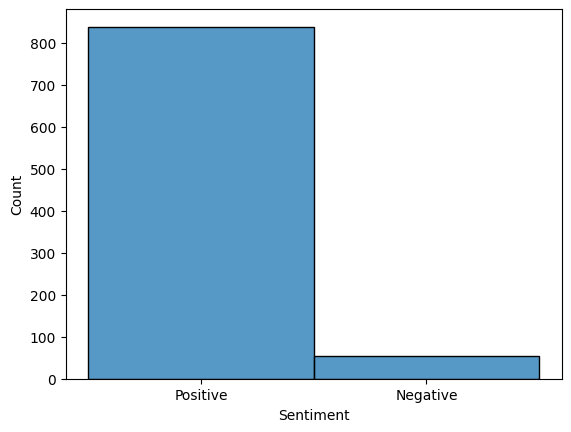

In [19]:
sns.histplot(df['Sentiment'])

# Tokenization

In [20]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\878662\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\878662\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\878662\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Tokenization, stop words removal, lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization
    tokens = [token for token in tokens if token.isalpha()]  # Remove punctuation
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Stemming
    return ' '.join(tokens)  # Join tokens into a single string

df['processed_text'] = df['review description'].apply(preprocess_text)

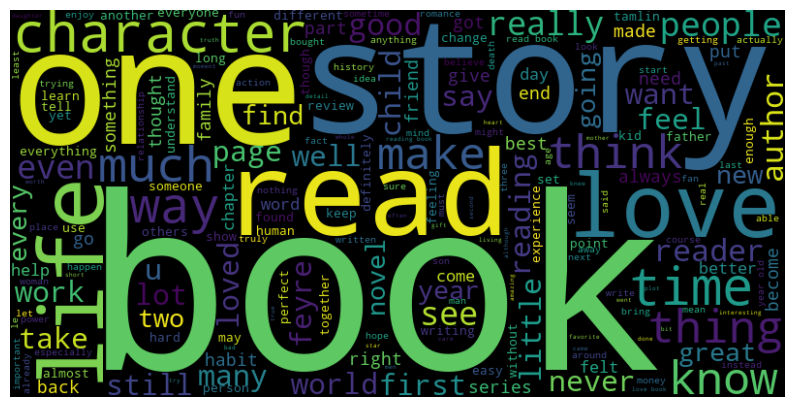

In [22]:
# Generate word cloud
all_text = ' '.join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Traditional Machine Learning

### Logistic Regression Classifier

In [23]:
# Convert text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
label_encoder = LabelEncoder()
X = tfidf_vectorizer.fit_transform(df['processed_text'])
y = label_encoder.fit_transform(df['Sentiment'] == 'Positive')

In [24]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# The data is not balanced yet
# Apply SMOTE to balance the training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [27]:
# Predictions
y_pred = clf.predict(X_test)

In [28]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9385474860335196
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.94      1.00      0.97       167

    accuracy                           0.94       179
   macro avg       0.97      0.54      0.56       179
weighted avg       0.94      0.94      0.91       179



In [30]:
# Define the function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, label_encoder, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

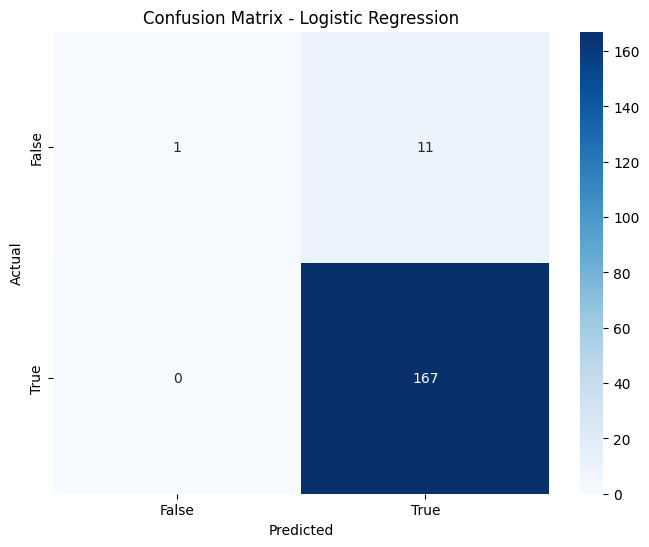

In [31]:
plot_confusion_matrix(y_test, y_pred, label_encoder, title='Confusion Matrix - Logistic Regression')

### Random Forest with Grid Search hyperparameter

In [32]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [33]:
rf_classifier = RandomForestClassifier() # Initialize random forest classifier

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled) # Fitting the grid search classifier

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [36]:
best_rf_classifier = grid_search.best_estimator_
y_pred_rand = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rand)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_rand))

Accuracy: 0.9329608938547486
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.93      1.00      0.97       167

    accuracy                           0.93       179
   macro avg       0.47      0.50      0.48       179
weighted avg       0.87      0.93      0.90       179



C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


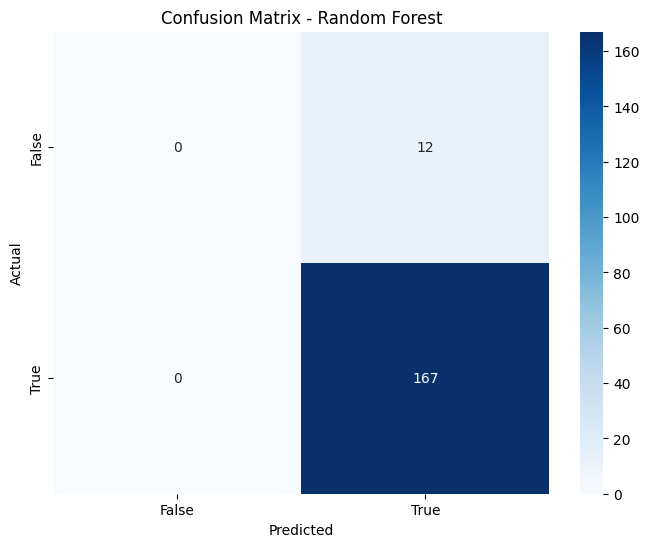

In [37]:
plot_confusion_matrix(y_test, y_pred_rand, label_encoder, title='Confusion Matrix - Random Forest')

### Naive Bayes
This model use GridSearch Hyperparmeter Tuning

In [38]:
# Import libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [39]:
# Define the parameter grid
param_grid = {
    'alpha': np.linspace(0.1, 1.0, 10)  # Vary alpha from 0.1 to 1.0
}

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)


# Evaluate the best model on the test set
best_nb_classifier = grid_search.best_estimator_
y_pred_NB = best_nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_NB)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_NB))

Accuracy: 0.9273743016759777
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.93      0.99      0.96       167

    accuracy                           0.93       179
   macro avg       0.47      0.50      0.48       179
weighted avg       0.87      0.93      0.90       179



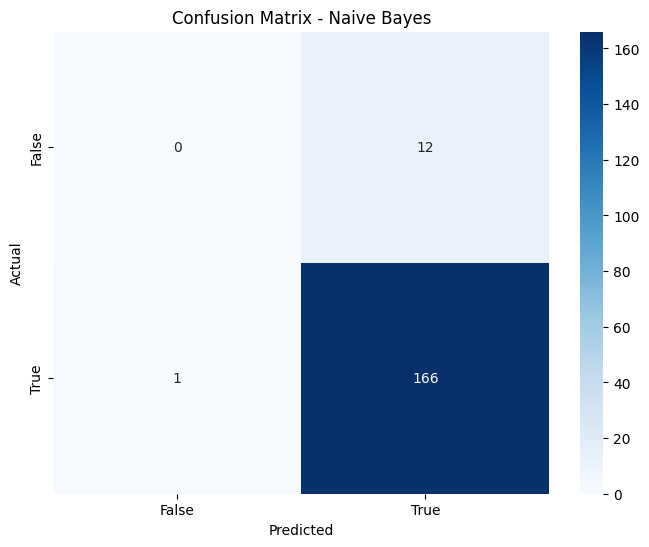

In [40]:
plot_confusion_matrix(y_test, y_pred_NB, label_encoder, title='Confusion Matrix - Naive Bayes')

### Support Vector Machine (SVM)

This model use GridSearch Hyperparmeter Tuning

In [41]:
# Import Libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [42]:
svm_classifier = SVC() # Initialize an SVM Classifier

In [43]:
# Define hyperparameter gridsearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [44]:
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy') # Perform Gridsearch
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [45]:
best_svm_classifier = grid_search.best_estimator_
y_pred_svm = best_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9329608938547486
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.93      1.00      0.97       167

    accuracy                           0.93       179
   macro avg       0.47      0.50      0.48       179
weighted avg       0.87      0.93      0.90       179



C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


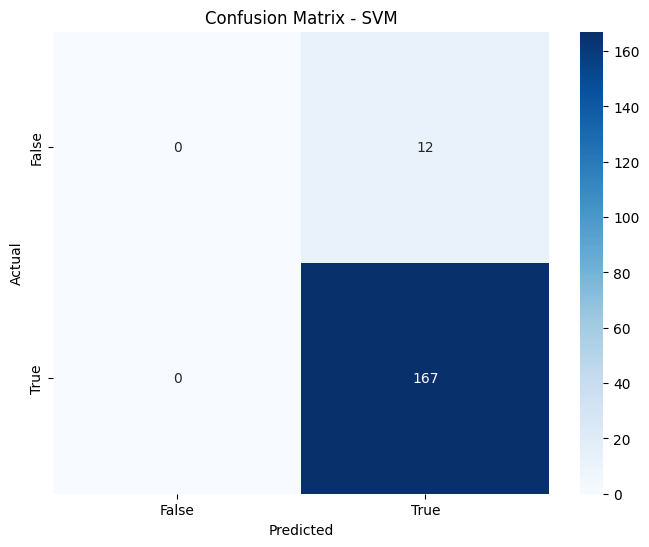

In [46]:
plot_confusion_matrix(y_test, y_pred_svm, label_encoder, title='Confusion Matrix - SVM')

### k-nearest Neighbors
This model use GridSearch Hyperparmeter Tuning

In [47]:
knn_classifier = KNeighborsClassifier() # Initialize KNN

In [48]:
# Define hyperparameter gridsearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [49]:
# Perform Gridsearch
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [50]:
best_knn_classifier = grid_search.best_estimator_
y_pred_KNN = best_knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_KNN))

Accuracy: 0.9273743016759777
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        12
           1       0.94      0.99      0.96       167

    accuracy                           0.93       179
   macro avg       0.64      0.54      0.55       179
weighted avg       0.90      0.93      0.91       179



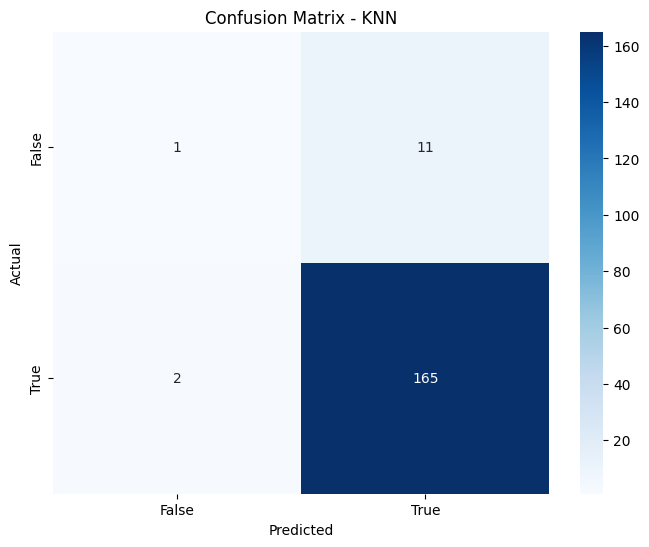

In [51]:
plot_confusion_matrix(y_test, y_pred_KNN, label_encoder, title='Confusion Matrix - KNN')

# Deep Learning

### Convolutional Neural Networks

Epoch 1/10
12/12 [==============================] - 11s 877ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.3894 - val_accuracy: 0.9330
Epoch 2/10
12/12 [==============================] - 9s 760ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4069 - val_accuracy: 0.9330
Epoch 3/10
12/12 [==============================] - 9s 778ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.4216 - val_accuracy: 0.9330
Epoch 4/10
12/12 [==============================] - 9s 766ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.4261 - val_accuracy: 0.9330
Epoch 5/10
12/12 [==============================] - 9s 759ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4429 - val_accuracy: 0.9330
Epoch 6/10
12/12 [==============================] - 9s 759ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4561 - val_accuracy: 0.9330
Epoch 7/10
12/12 [==============================] - 10s 805ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.4538 - val_accuracy: 0.9330
Epoc

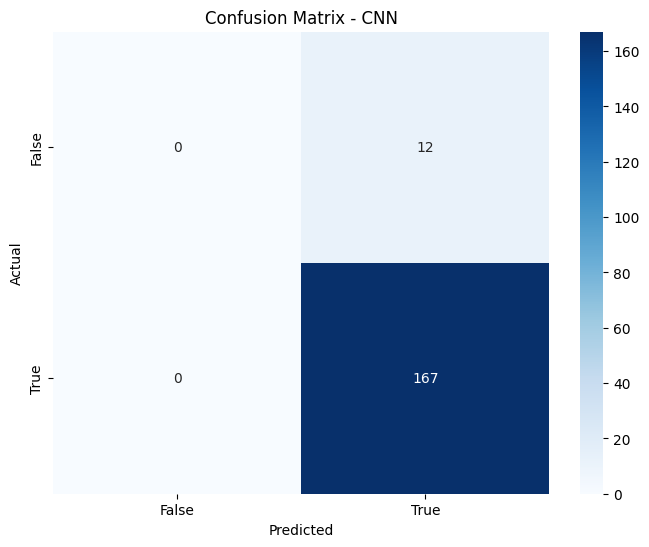

6/6 [==============================] - 0s 66ms/step - loss: 0.4553 - accuracy: 0.9330
Test Accuracy: 0.9329608678817749


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


# Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review description'])
X = tokenizer.texts_to_sequences(df['review description'])
X = pad_sequences(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'] == 'Positive')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_sequence_length = X.shape[1]

model_CNN = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred_CNN = (model_CNN.predict(X_test) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_CNN, label_encoder, title='Confusion Matrix - CNN')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

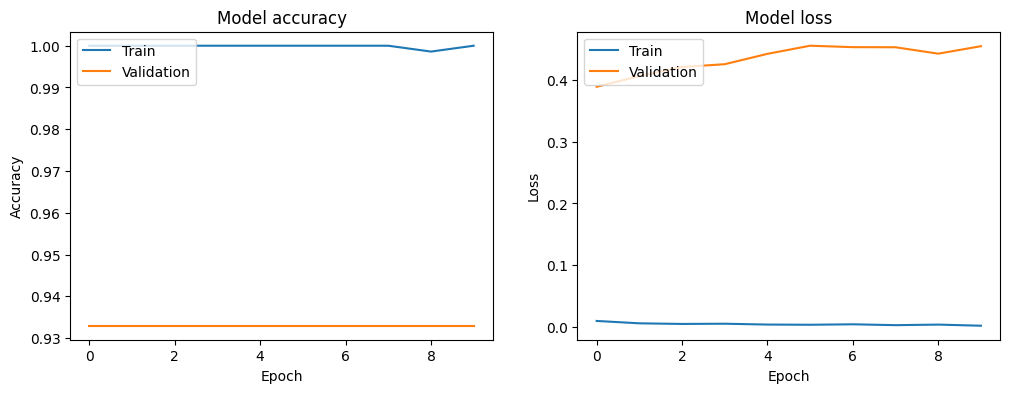

In [55]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Long Short-Term Memory Networks

Epoch 1/10
12/12 [==============================] - 201s 17s/step - loss: 0.5544 - accuracy: 0.8836 - val_loss: 0.3234 - val_accuracy: 0.9330
Epoch 2/10
12/12 [==============================] - 232s 19s/step - loss: 0.2941 - accuracy: 0.9425 - val_loss: 0.2468 - val_accuracy: 0.9330
Epoch 3/10
12/12 [==============================] - 239s 20s/step - loss: 0.2522 - accuracy: 0.9425 - val_loss: 0.2465 - val_accuracy: 0.9330
Epoch 4/10
12/12 [==============================] - 243s 20s/step - loss: 0.2344 - accuracy: 0.9425 - val_loss: 0.2481 - val_accuracy: 0.9330
Epoch 5/10
12/12 [==============================] - 251s 21s/step - loss: 0.2471 - accuracy: 0.9425 - val_loss: 0.2459 - val_accuracy: 0.9330
Epoch 6/10
12/12 [==============================] - 255s 21s/step - loss: 0.2374 - accuracy: 0.9425 - val_loss: 0.2452 - val_accuracy: 0.9330
Epoch 7/10
12/12 [==============================] - 251s 21s/step - loss: 0.2237 - accuracy: 0.9425 - val_loss: 0.2492 - val_accuracy: 0.9330
Epoch 

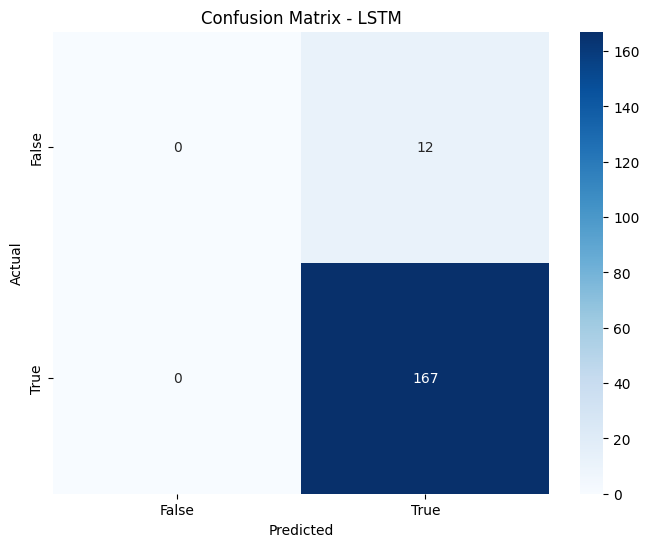

6/6 [==============================] - 5s 887ms/step - loss: 0.3124 - accuracy: 0.9330
Test Accuracy: 0.9329608678817749


In [56]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review description'])
X = tokenizer.texts_to_sequences(df['review description'])
X = pad_sequences(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'] == 'Positive')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_sequence_length = X.shape[1]

model_LSTM = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred_LSTM = (model_LSTM.predict(X_test) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_LSTM, label_encoder, title='Confusion Matrix - LSTM')

# Evaluate the model
loss, accuracy = model_LSTM.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

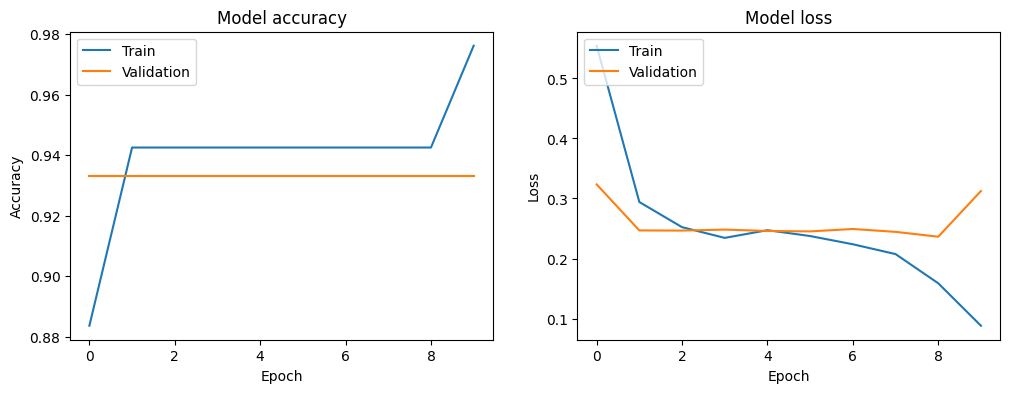

In [59]:
plt.figure(figsize=(12, 4))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Recurrent Neural Networks

Epoch 1/10
12/12 [==============================] - 37s 3s/step - loss: 0.3518 - accuracy: 0.8836 - val_loss: 0.2874 - val_accuracy: 0.9330
Epoch 2/10
12/12 [==============================] - 38s 3s/step - loss: 0.2763 - accuracy: 0.9425 - val_loss: 0.2459 - val_accuracy: 0.9330
Epoch 3/10
12/12 [==============================] - 36s 3s/step - loss: 0.2325 - accuracy: 0.9425 - val_loss: 0.2473 - val_accuracy: 0.9330
Epoch 4/10
12/12 [==============================] - 36s 3s/step - loss: 0.2248 - accuracy: 0.9425 - val_loss: 0.2483 - val_accuracy: 0.9330
Epoch 5/10
12/12 [==============================] - 36s 3s/step - loss: 0.2283 - accuracy: 0.9425 - val_loss: 0.2484 - val_accuracy: 0.9330
Epoch 6/10
12/12 [==============================] - 36s 3s/step - loss: 0.2246 - accuracy: 0.9425 - val_loss: 0.2615 - val_accuracy: 0.9330
Epoch 7/10
12/12 [==============================] - 35s 3s/step - loss: 0.2438 - accuracy: 0.9425 - val_loss: 0.2522 - val_accuracy: 0.9330
Epoch 8/10
12/12 [==

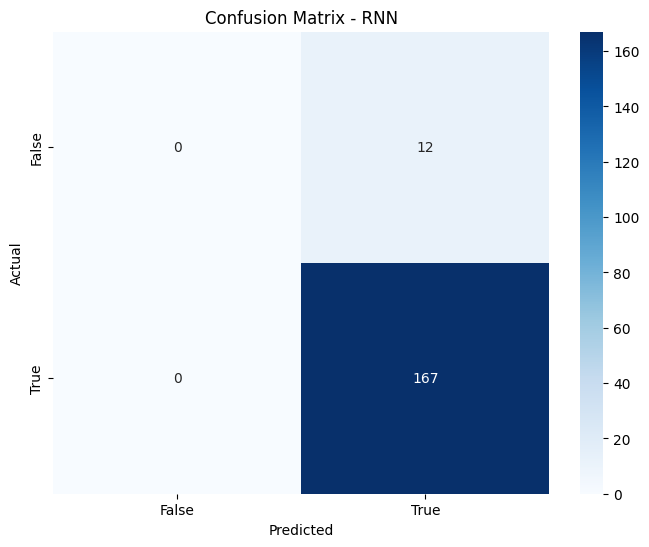

6/6 [==============================] - 1s 184ms/step - loss: 0.2740 - accuracy: 0.9330
Test Accuracy: 0.9329608678817749


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout


# Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review description'])
X = tokenizer.texts_to_sequences(df['review description'])
X = pad_sequences(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'] == 'Positive')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_sequence_length = X.shape[1]

model_RNN = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    SimpleRNN(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_RNN = model_RNN.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred_RNN = (model_RNN.predict(X_test) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_RNN, label_encoder, title='Confusion Matrix - RNN')

# Evaluate the model
loss, accuracy = model_RNN.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

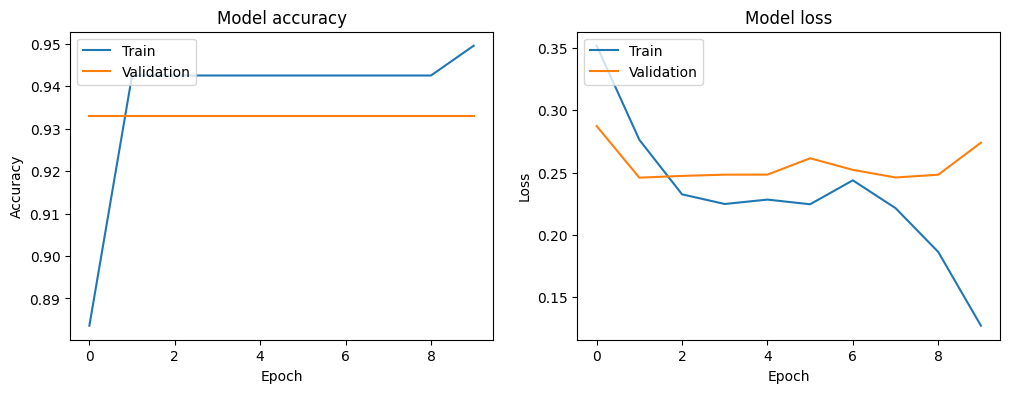

In [61]:
plt.figure(figsize=(12, 4))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Gated Recurrent Unit Networks

Epoch 1/10
12/12 [==============================] - 281s 23s/step - loss: 0.6143 - accuracy: 0.8976 - val_loss: 0.4011 - val_accuracy: 0.9330
Epoch 2/10
12/12 [==============================] - 297s 25s/step - loss: 0.2763 - accuracy: 0.9425 - val_loss: 0.2534 - val_accuracy: 0.9330
Epoch 3/10
12/12 [==============================] - 307s 26s/step - loss: 0.2166 - accuracy: 0.9425 - val_loss: 0.2451 - val_accuracy: 0.9330
Epoch 4/10
12/12 [==============================] - 314s 26s/step - loss: 0.1642 - accuracy: 0.9425 - val_loss: 0.2531 - val_accuracy: 0.9330
Epoch 5/10
12/12 [==============================] - 320s 27s/step - loss: 0.1362 - accuracy: 0.9425 - val_loss: 0.2528 - val_accuracy: 0.9330
Epoch 6/10
12/12 [==============================] - 322s 27s/step - loss: 0.0908 - accuracy: 0.9635 - val_loss: 0.2855 - val_accuracy: 0.9330
Epoch 7/10
12/12 [==============================] - 329s 27s/step - loss: 0.0603 - accuracy: 0.9818 - val_loss: 0.3239 - val_accuracy: 0.9330
Epoch 

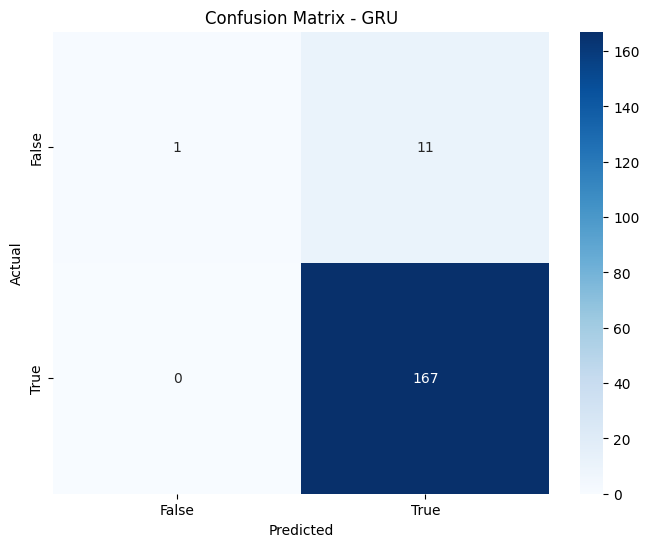

6/6 [==============================] - 5s 801ms/step - loss: 0.6125 - accuracy: 0.9385
Test Accuracy: 0.9385474920272827


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout


# Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review description'])
X = tokenizer.texts_to_sequences(df['review description'])
X = pad_sequences(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'] == 'Positive')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_sequence_length = X.shape[1]

model_GRU = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    GRU(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_GRU = model_GRU.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred_GRU = (model_GRU.predict(X_test) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_GRU, label_encoder, title='Confusion Matrix - GRU')


# Evaluate the model
loss, accuracy = model_GRU.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

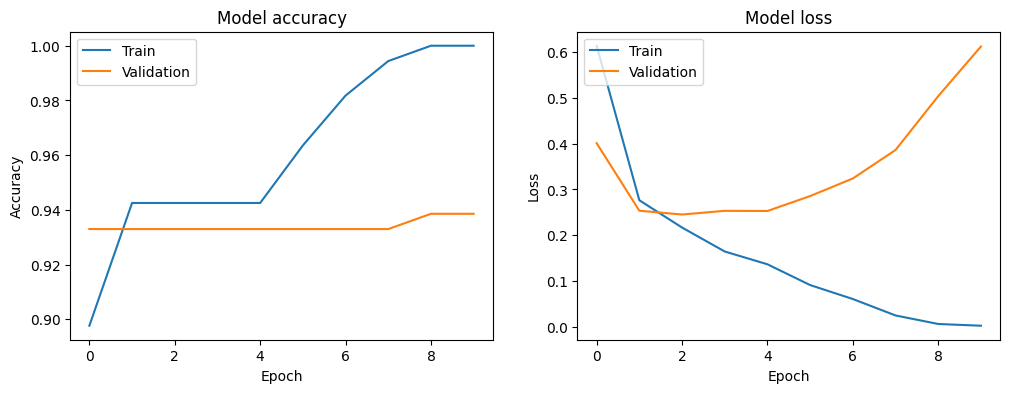

In [63]:
plt.figure(figsize=(12, 4))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()